# Первое знакомство с NumPy, SciPy и Matplotlib

## Numpy

In [1]:
import numpy as np

In [2]:
x = [2, 3, 4, 6]
y = np.array(x)

In [3]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [4]:
print x[1:3]

[3, 4]


In [5]:
print y[1:3]

[3 4]


In [6]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [7]:
print y[[0, 2]]

[2 4]


In [8]:
print y[y>3]

[4 6]


In [9]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [10]:
print y * 5

[10 15 20 30]


In [11]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [12]:
print y ** 2

[ 4  9 16 36]


In [13]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [14]:
print matrix[1][2]

0


In [15]:
print nd_array[1, 2]

0


In [16]:
print np.random.rand()

0.40813417225


In [17]:
print np.random.randn()

0.449204151304


In [18]:
print np.random.randn(4)

[ 0.44437189 -0.06655462 -0.65938995  2.14707726]


In [19]:
print np.random.randn(4, 5)

[[ 0.34111144 -0.86438606 -0.70325142  0.28696744  0.30444252]
 [ 1.99364225  0.56755873 -1.44874371  0.53583981 -0.46536275]
 [ 0.0421277  -1.94238734  1.0733928  -0.33107958  0.71134058]
 [ 0.47276425  0.68308732  0.69199537  0.77577877 -1.77496689]]


In [ ]:
print np.arange(0, 8, 0.1)

In [ ]:
print range(0, 8, 0.1)

In [20]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

The slowest run took 36.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.08 µs per loop


KeyboardInterrupt: 

## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list


In [21]:
def for_linspace(start, stop, count):
    step = (stop - start) / (count - 1)
    for i in range(count):
        yield start
        start += step

def compr_linspace(start, stop, count):
    step = (stop - start) / (count - 1)
    return [start + step*i for i in range(count)]

%timeit np.linspace(1, 100, 10000)
%timeit for_linspace(1, 100, 10000)
%timeit compr_linspace(1, 100, 10000)

The slowest run took 12.90 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 28.5 µs per loop
The slowest run took 4.42 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 485 ns per loop
1000 loops, best of 3: 682 µs per loop


## SciPy

In [24]:
from scipy import optimize

In [25]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [33]:
methods = ['Nelder-Mead',
'Powell',
'BFGS',
'L-BFGS-B',
'TNC',
'COBYLA',
'SLSQP']

d = {}
for meth in methods:
    print meth
    x_min = optimize.minimize(f, [5, 5], method=meth)
    print x_min
    d[meth] = x_min.nfev

print d

Nelder-Mead
 final_simplex: (array([[ 3.20001992,  0.09998117],
       [ 3.19995515,  0.0999887 ],
       [ 3.19996773,  0.09995848]]), array([ 3.,  3.,  3.]))
           fun: 3.0000000007515375
       message: 'Optimization terminated successfully.'
          nfev: 87
           nit: 45
        status: 0
       success: True
             x: array([ 3.20001992,  0.09998117])
Powell
   direc: array([[ 1.,  0.],
       [ 0.,  1.]])
     fun: 3.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 2
  status: 0
 success: True
       x: array([ 3.19999999,  0.10000001])
BFGS
      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([ -2.05636024e-06,   5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 3.19999896,  0.10000026])
L-BFGS-B
      fun: 3.0000000000006546
 hess_inv: <2x2 LbfgsInvHessPr

In [ ]:
print x_min.x

In [ ]:
from scipy import linalg

In [ ]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

In [ ]:
print np.dot(a, x)

In [ ]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

## Matplotlib

In [35]:
%matplotlib inline

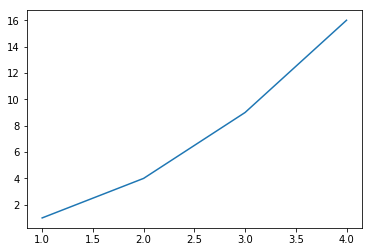

In [36]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

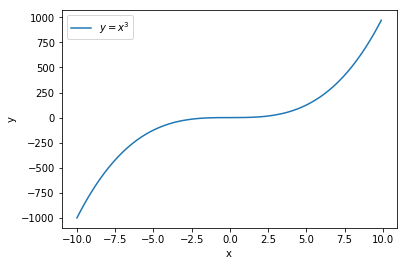

AttributeError: 'module' object has no attribute 'clear'

In [41]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y, label="$y = x^3$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


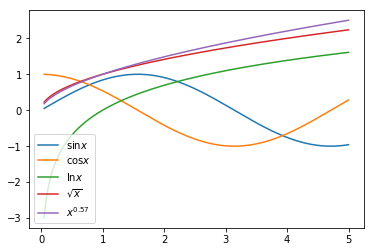

In [54]:
x = np.linspace(0.05, 5, 1000)
funs = [np.sin, np.cos, np.log, np.sqrt, lambda x: x**0.57]
names = [r"\sin x", r"\cos x", r"\ln x", r"\sqrt{x}", r"x^{0.57}"]
for f, name in zip(funs, names):
    plt.plot(x, f(x), label="${}$".format(name))
plt.legend()

## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

## Все вместе (numpy + scipy + matplotlib)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [ ]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

In [ ]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

In [ ]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()